In [17]:
from sklearn.datasets import fetch_california_housing
from src.methods.partial_dependence_based.h_statistic.api import FriedmanHStatistic
from src.methods.partial_dependence_based.variable_interaction.api import GreenwellVariableInteraction
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from src.domain.domain import INTERACTION_GRAPH, BAR_CHART, HEATMAP

In [18]:
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target
model = RandomForestRegressor().fit(X, y)

In [19]:
vint = GreenwellVariableInteraction()
vint.fit(model, X, 50, show_progress=True)  # all features - GreenwellVariableInteraction

one vs one: 100%|██████████| 28/28 [09:17<00:00, 19.89s/it]


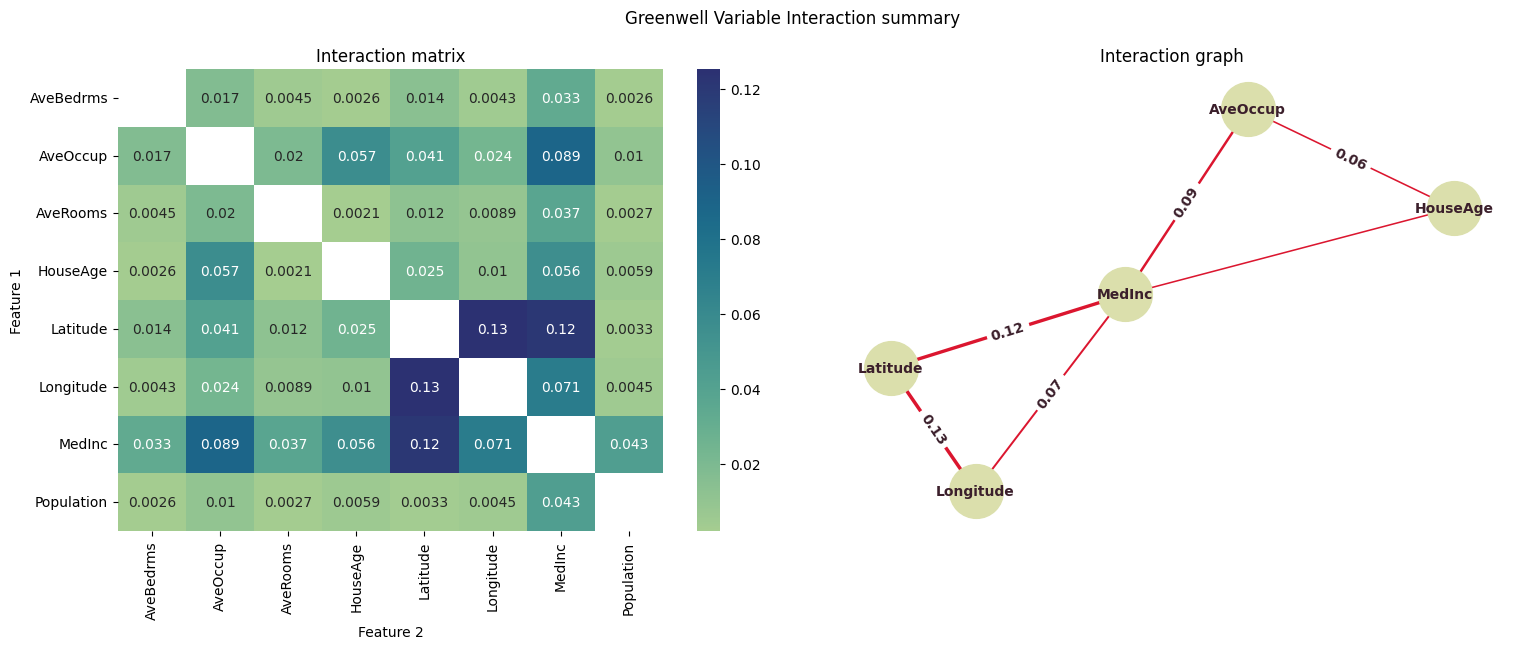

In [20]:
vint.plot()  # summary - GreenwellVariableInteraction

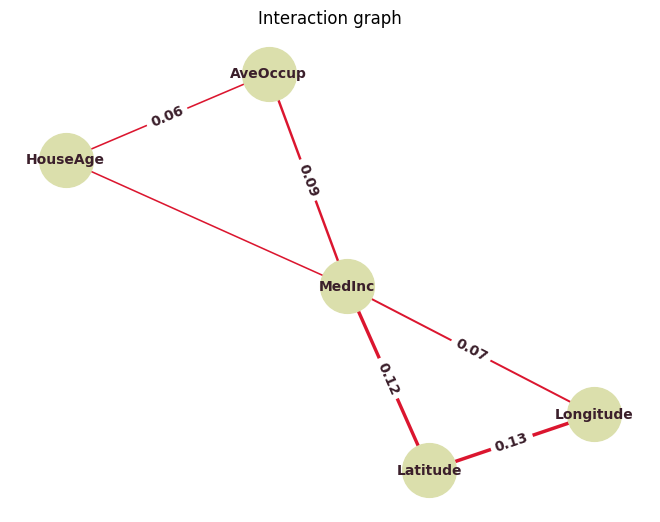

In [21]:
vint.plot(INTERACTION_GRAPH)  # interaction graph - GreenwellVariableInteraction

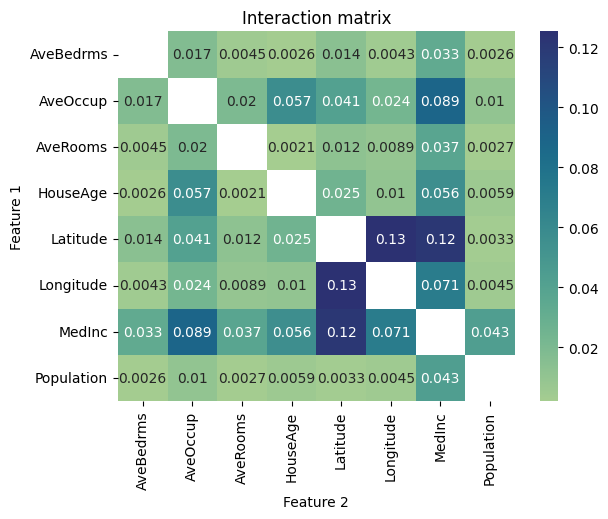

In [22]:
vint.plot(HEATMAP)  # heatmap - GreenwellVariableInteraction

In [23]:
vint_subset = GreenwellVariableInteraction()
vint_subset.fit(model, X, 50, features=["Latitude", "Longitude", "HouseAge"], show_progress=True)  # subset of features - GreenwellVariableInteraction

one vs one: 100%|██████████| 3/3 [00:47<00:00, 15.67s/it]


In [24]:
h_stat = FriedmanHStatistic()
h_stat.fit(model, X, 100, show_progress=True)  # all features - FriedmanHStatistic

one vs all: 100%|██████████| 8/8 [00:25<00:00,  3.17s/it]


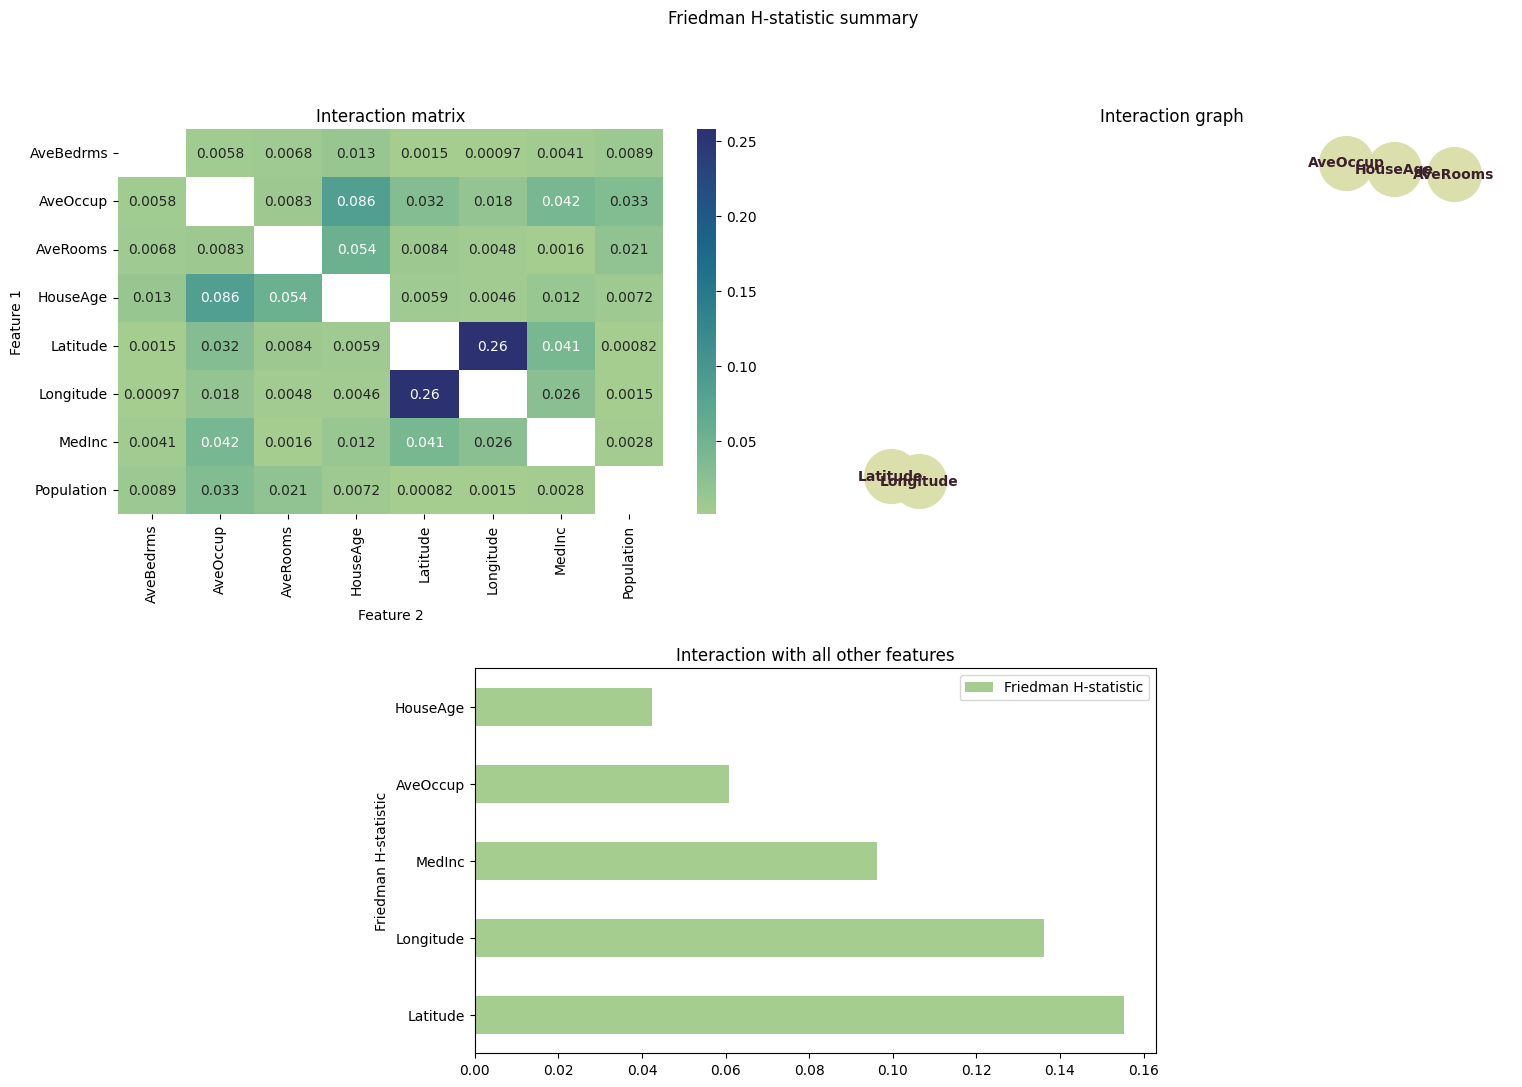

In [25]:
h_stat.plot()  # summary - FriedmanHStatistic

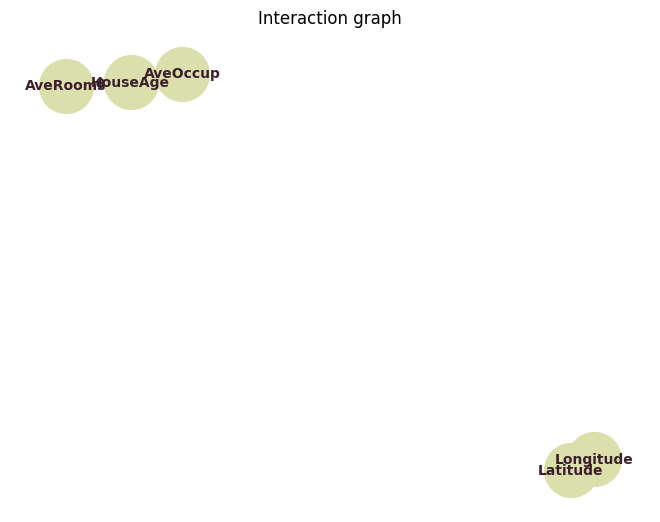

In [26]:
h_stat.plot(INTERACTION_GRAPH)  # interaction graph - FriedmanHStatistic

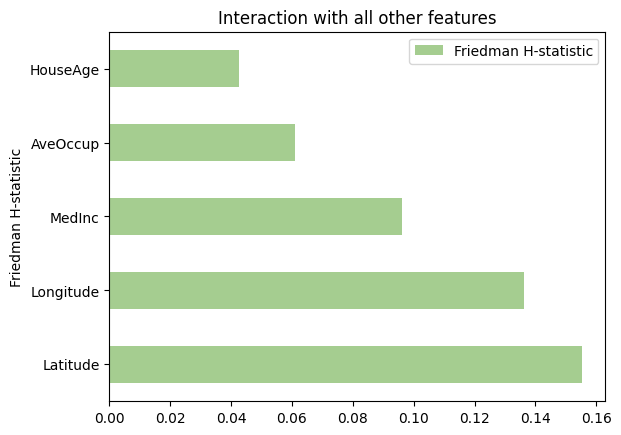

In [27]:
h_stat.plot(BAR_CHART)  # bar chart - FriedmanHStatistic

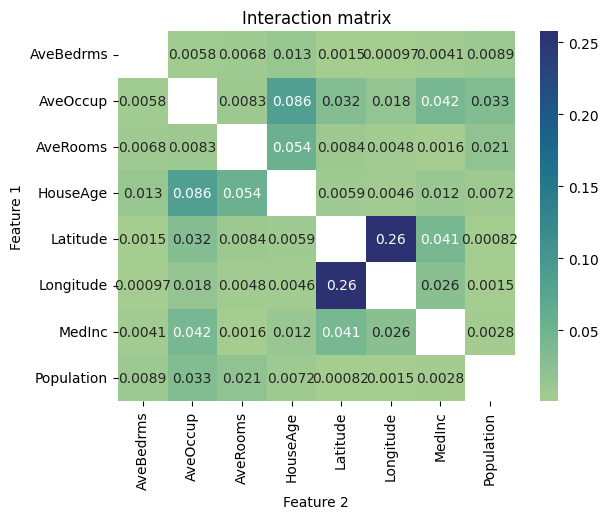

In [28]:
h_stat.plot(HEATMAP)  # heatmap - FriedmanHStatistic

In [29]:
h_stat_subset = FriedmanHStatistic()
h_stat_subset.fit(model, X, 100, features=["Latitude", "Longitude", "HouseAge"], show_progress=True)  # subset of features - FriedmanHStatistic

one vs all: 100%|██████████| 3/3 [00:09<00:00,  3.19s/it]
